In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Hitters.csv")
df.dropna(inplace=True)

In [4]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Model with all variables**

In [26]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [27]:
y_pred = cart_model.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

468.49579052913884

**Model with only "Hits" variable**

In [29]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [30]:
X_train.head()

,Hits
183,91.0
229,144.0
286,152.0
102,49.0
153,95.0


In [31]:
X_test.head()

,Hits
148,136.0
154,147.0
318,136.0
279,96.0
88,41.0


In [32]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train, y_train)

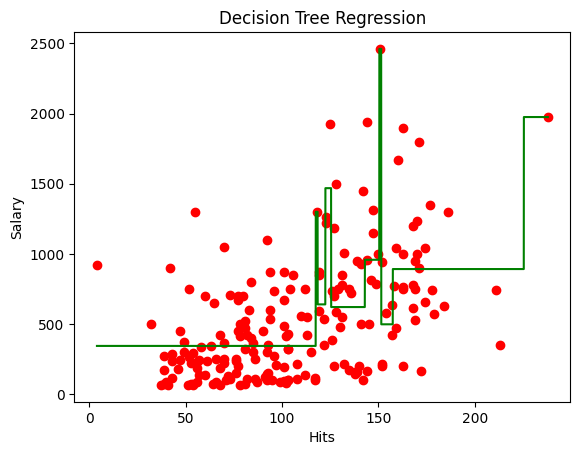

In [36]:
X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="green")

plt.title("Decision Tree Regression")
plt.xlabel("Hits")
plt.ylabel("Salary")
plt.show()

**Prediction**

In [34]:
y_pred = cart_model.predict(X_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

486.34593105235456

**Model Tuning**

In [57]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [62]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

468.49579052913884

In [63]:
cart_params = {"max_depth" : [2,3,4,5,10,20],
               "min_samples_split" : [2,10,5,50,100]}

In [64]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)

In [65]:
cart_cv_model.best_params_

{'max_depth': 2, 'min_samples_split': 100}

**Final Model**

In [66]:
cart_model = DecisionTreeRegressor(max_depth=2, min_samples_split=100).fit(X_train, y_train)

In [67]:
y_pred = cart_model.predict(X_test)

In [68]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

433.39601201149367

In [ ]:
# help(cart_model)

''' splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.


min_samples_split : int or float, default=2
 |      The minimum number of samples required to split an internal node:
 |
 |      - If int, then consider `min_samples_split` as the minimum number.
 |      - If float, then `min_samples_split` is a fraction and
 |        `ceil(min_samples_split * n_samples)` are the minimum
 |        number of samples for each split.



min_samples_leaf : int or float, default=1
 |      The minimum number of samples required to be at a leaf node.
 |      A split point at any depth will only be considered if it leaves at
 |      least ``min_samples_leaf`` training samples in each of the left and
 |      right branches.  This may have the effect of smoothing the model,
 |      especially in regression.

 '''